In [0]:
!pip install kaggle

# to access kaggle datasets

In [0]:
!pip install numpy==1.15.0


#math ops

    100% |████████████████████████████████| 13.9MB 2.4MB/s 
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


In [0]:
!pip install catboost

# machine learning

    100% |████████████████████████████████| 60.1MB 504kB/s 


In [0]:
#data preprocessing

import pandas as pd

# math ops

import numpy as np

#machine learning

from catboost import CatBoostRegressor, Pool

# data scaling

from sklearn.preprocessing import StandardScaler

# hyper parameter optimisation

from sklearn.model_selection import GridSearchCV

# supprt vector machine model
from sklearn.svm import NuSVR, SVR

#kernel ridge model
from sklearn.kernel_ridge import KernelRidge

# data visualization
import matplotlib.pyplot as plt

In [0]:
# Step 2 Importing data from kaggle
# collect kaggle data

#colab file access feature
from google.colab import files

# retrieve uploaded files
uploaded = files.upload()

# then move kaggle.json into the folder where the api expects to fin
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/kaggle/kaggle.json

Saving kaggle.json to kaggle.json
chmod: cannot access '/root/kaggle/kaggle.json': No such file or directory


In [0]:
# list of kaggle comps
!kaggle competitions list

ref                                                deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                   2030-01-01 00:00:00  Getting Started  Knowledge       2645           False  
titanic                                            2030-01-01 00:00:00  Getting Started  Knowledge      10989           False  
house-prices-advanced-regression-techniques        2030-01-01 00:00:00  Getting Started  Knowledge       4407           False  
imagenet-object-localization-challenge             2029-12-31 07:00:00  Research         Knowledge         34           False  
competitive-data-science-predict-future-sales      2019-12-31 23:59:00  Playground           Kudos       2679           False  
two-sigma-financial-news                           2019-07-15 23:59:00  Featured          $100,000      

In [0]:
# download earthquake data
!kaggle competitions download -c LANL-Earthquake-Prediction

  0% 0.00/33.3k [00:00<?, ?B/s]
100% 33.3k/33.3k [00:00<00:00, 13.4MB/s]
 94% 228M/242M [00:01<00:00, 157MB/s]
100% 242M/242M [00:01<00:00, 177MB/s]
100% 2.02G/2.03G [00:42<00:00, 19.9MB/s]
100% 2.03G/2.03G [00:42<00:00, 51.4MB/s]


In [0]:
#unzip training data for usage

!unzip train.csv.zip 
!ls

Archive:  train.csv.zip
  inflating: train.csv               
sample_data  sample_submission.csv  test.zip  train.csv  train.csv.zip


In [0]:
# Extract training data into a dataframe
train = pd.read_csv('train.csv', nrows=6000000, dtype={'acoustic_data' : np.int16, 'time_to_failure' : np.float64})

In [0]:
train.head(10)

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691
5,8,1.4691
6,9,1.4691
7,7,1.4691
8,-5,1.4691
9,3,1.4691


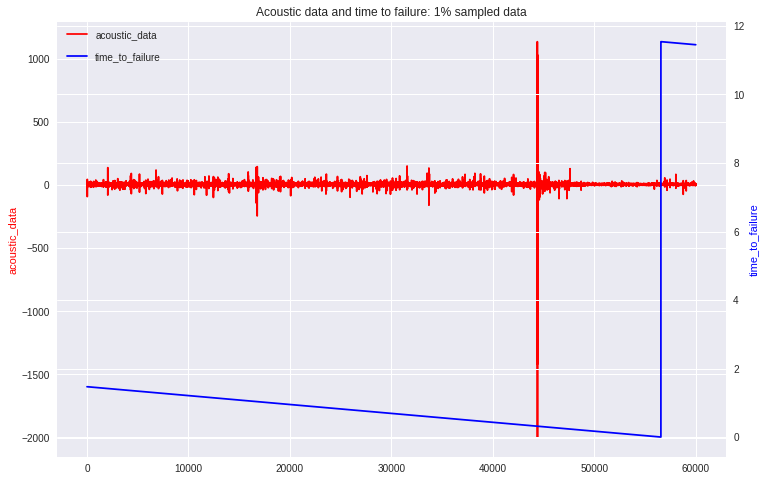

In [0]:
# visulaize the sample dataset

train_ad_sample_df = train['acoustic_data'].values[::100]
train_ttf_sample_df = train['time_to_failure'].values[::100]

#plotting based on both features

def plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df, title="Acoustic data and time to failure: 1% sampled data"):
  fig, ax1 = plt.subplots(figsize = (12, 8))
  plt.title(title)
  
  plt.plot(train_ad_sample_df,color = 'r')
  ax1.set_ylabel('acoustic_data', color = 'r')
  plt.legend(['acoustic_data'], loc = (0.01, 0.95))
  ax2 = ax1.twinx()
  
  
  plt.plot(train_ttf_sample_df,color = 'b')
  ax2.set_ylabel('time_to_failure', color = 'b')
  plt.legend(['time_to_failure'], loc = (0.01, 0.9))
  
  plt.grid(True)
  
plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df)
del train_ad_sample_df
del train_ttf_sample_df

In [0]:
# feature engineering
